In [106]:
import numpy as np
import pandas as pd
import plotnine as pt
import matplotlib.pyplot as plt

In [4]:
df = pd.read_csv("./diamonds.csv")

In [5]:
df.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [49]:
len(df["carat"])

53940

In [6]:
df = df.drop("Unnamed: 0", axis=1)

In [7]:
#Gradient Descent for 1 indep, 1 dep variable
def linear_simple_gradient(x,y,learning_rate,epochs):
    intercept = slope = 0
    intercept_steps = []
    slope_steps = []
    difference_intercept = []
    difference_slope = []
    for i in range(epochs):
        y_pred = intercept + slope * x 
        int_der = -2 * sum(y - y_pred) / len(x) #MSE derivative for intercept
        slope_der = -2 * sum(x * (y - y_pred)) / len(x) #MSE derivative for slope
        stepsize_int = learning_rate * int_der
        stepsize_slope = learning_rate * slope_der
        intercept_steps.append(stepsize_int)
        slope_steps.append(stepsize_slope)
        intercept = intercept - stepsize_int
        slope = slope - stepsize_slope
    intercept_steps = pd.DataFrame({"x":intercept_steps})
    slope_steps = pd.DataFrame({"x":slope_steps})
    difference_intercept = pd.DataFrame({"x":difference_intercept})
    difference_slope = pd.DataFrame({"x":difference_slope})
    a = (pt.ggplot(intercept_steps) + 
         pt.aes(intercept_steps.index.values.tolist(), "x") + 
         pt.geom_line() + 
         pt.ylab("Step_size Intercept") +
         pt.xlab("Progression")
    )
    c = (pt.ggplot(slope_steps) + 
         pt.aes(slope_steps.index.values.tolist(), "x") + 
         pt.geom_line() + 
         pt.ylab("Step_size Slope") +
         pt.xlab("Progression")
    )
    return f"intercept: {intercept:.2f}, slope: {slope:.2f}", a, c

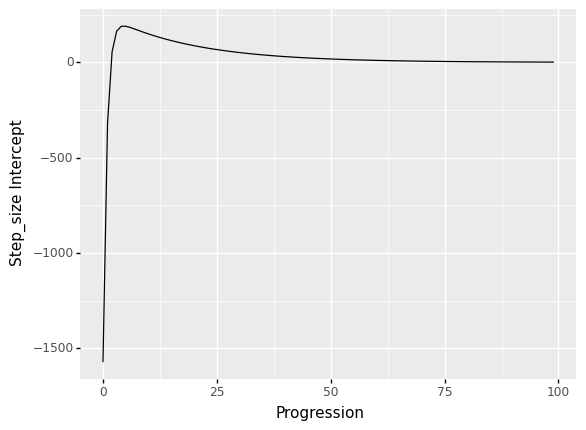

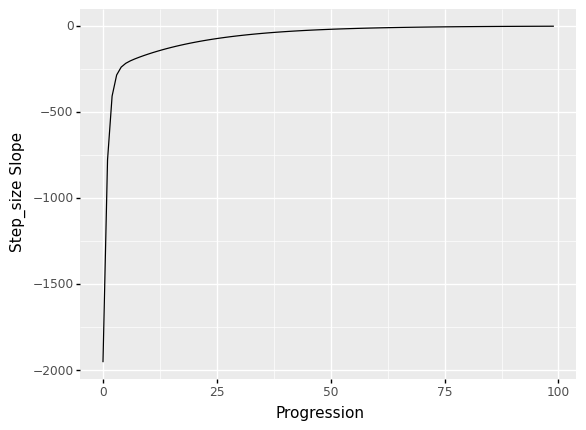

('intercept: -2232.64, slope: 7730.56',
 <ggplot: (8731803739365)>,
 <ggplot: (8731803734622)>)

In [70]:
linear_simple_gradient(df["carat"], df["price"], 0.2, 100)

In [9]:
np.polyfit(df["carat"],df["price"], 1)

array([ 7756.42561797, -2256.36058005])

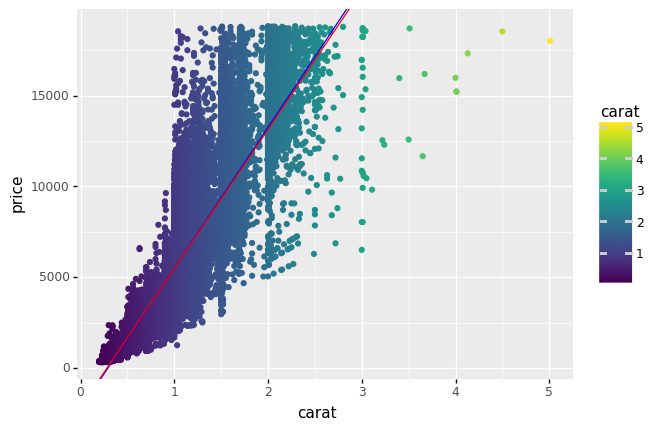

<ggplot: (8731820055284)>

In [11]:
(pt.ggplot(df) + 
 pt.aes(x = "carat", y = "price", color = "carat") + 
 pt.geom_point() + 
 pt.geom_abline(intercept=-2256.36058005, slope=7756.42561797, color="Blue") + #numpys
 pt.geom_abline(intercept=-2159.06, slope=7650.31, color="Red") #mine
 )

In [98]:
params = np.polyfit(df["carat"],df["price"], 2)
print('Fitted Parameters:', params)

modelPredictions = np.polyval(params, df["carat"])
absError = modelPredictions - df["price"]

SE = np.square(absError) # squared errors
MSE = np.mean(SE) # mean squared errors
RMSE = np.sqrt(MSE) # Root Mean Squared Error, RMSE
Rsquared = 1.0 - (np.var(absError) / np.var(df["price"]))
print('RMSE:', RMSE)
print('R-squared:', Rsquared)

Fitted Parameters: [  507.91326733  6677.02734194 -1832.57737161]
RMSE: 1540.0597098970172
R-squared: 0.8509749241822302


(-2719.0983117959613, 21000.0)

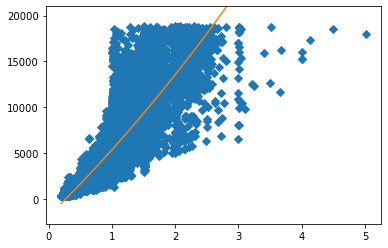

In [105]:
plt.plot(df["carat"], df["price"],  'D')

# create data for the fitted equation plot
xModel = np.linspace(min(df["carat"]), max(df["carat"]))
yModel = np.polyval(params, xModel)

# now the model as a line plot
plt.plot(xModel, yModel)
plt.ylim(top=21000)
